In [1]:
import glob
import numpy as np
import pandas as pd
import plotly as py
import cufflinks as cf
%matplotlib inline

In [2]:
train_A_over_logs = "../eval/20190329_RetinaNet_train_A_over_class_eval/13"
train_B_over_logs = "../eval/20190329_RetinaNet_train_B_over_class_eval/13"
train_C_over_logs = "../eval/20190329_RetinaNet_train_C_over_class_eval/13"
train_A_over_ganaug_025_logs = "../eval/20190329_RetinaNet_train_A_over_ganaug_025_class_eval/13"
train_A_over_ganaug_050_logs = "../eval/20190329_RetinaNet_train_A_over_ganaug_050_class_eval/13"
pattern = "/**/*test_night*.txt"

train_A_over_iteration = None # None = best
train_B_over_iteration = None # None = best
train_C_over_iteration = None # None = best
train_A_over_ganaug_025_iteration = None # None = best
train_A_over_ganaug_050_iteration = None # None = best

In [3]:
train_A_over_logs = glob.glob(train_A_over_logs + pattern, recursive = True)
train_B_over_logs = glob.glob(train_B_over_logs + pattern, recursive = True)
train_C_over_logs = glob.glob(train_C_over_logs + pattern, recursive = True)

train_A_over_ganaug_025_logs = glob.glob(train_A_over_ganaug_025_logs + pattern, recursive = True)
train_A_over_ganaug_050_logs = glob.glob(train_A_over_ganaug_050_logs + pattern, recursive = True)

In [4]:
def logs2df(logs, iteration = None):
    df_iterations = pd.DataFrame()
    last_iteration = -1
    for log in logs:
        df = pd.read_csv(log)
        df = df.drop(columns = ["Unnamed: 12"])
        df["Iteration"] = last_iteration if log.split("_model_")[-1].split("_")[0] == "final" else int(log.split("_model_")[-1].split("_")[0])
        df_iterations = pd.concat([df_iterations, df], axis = 0)
        df_iterations = df_iterations.reset_index(drop = True)
        last_iteration = df["Iteration"]
    df_iterations = df_iterations.sort_values(by = ['Iteration']).reset_index(drop = True)
    if iteration is not None:
        df_iterations = df_iterations.loc[df_iterations.Iteration == iteration].drop_duplicates(["Iteration"], keep = "last").reset_index(drop = True)
    df_iterations = df_iterations.set_index("Iteration")
    return df_iterations

## Best iterations ##

### --> All metrics are evaluated independently on their best iteration <-- ###

### train_A_over ###

In [5]:
df_train_A_over = logs2df(train_A_over_logs, train_A_over_iteration)
df_train_A_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
45000,0.262376,0.543235,0.22197,0.194307,0.459719,0.462617,0.122087,0.373867,0.401977,0.343705,0.593793,0.548077


In [6]:
df_train_A_over_best_iter_per_metric = df_train_A_over.idxmax().to_frame().T
df_train_A_over_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,45000,105000,45000,105000,45000,162500,45000,45000,162500,162500,45000,162500


In [7]:
df_train_A_over_best_val_per_metric = df_train_A_over.max().to_frame().T
df_train_A_over_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.262376,0.544699,0.22197,0.206596,0.459719,0.496525,0.122087,0.373867,0.404746,0.355578,0.593793,0.598077


### train_B_over ###

In [8]:
df_train_B_over = logs2df(train_B_over_logs, train_B_over_iteration)
df_train_B_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
67500,0.285811,0.594763,0.240018,0.216685,0.479244,0.531704,0.125586,0.391725,0.418923,0.363904,0.597379,0.594231


In [9]:
df_train_B_over_best_iter_per_metric = df_train_B_over.idxmax().to_frame().T
df_train_B_over_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,110000,110000,162500,112500,67500,67500,110000,162500,162500,110000,67500,162500


In [10]:
df_train_B_over_best_val_per_metric = df_train_B_over.max().to_frame().T
df_train_B_over_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.286816,0.600803,0.241801,0.222843,0.479244,0.531704,0.126255,0.395041,0.422756,0.371713,0.597379,0.603846


### train_C_over ###

In [11]:
df_train_C_over = logs2df(train_C_over_logs, train_C_over_iteration)
df_train_C_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
47500,0.282796,0.5981,0.235437,0.213916,0.474846,0.491099,0.124673,0.385884,0.417858,0.365936,0.585793,0.590385


In [12]:
df_train_C_over_best_iter_per_metric = df_train_C_over.idxmax().to_frame().T
df_train_C_over_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,65000,65000,65000,65000,65000,65000,65000,65000,102500,102500,65000,62500


In [13]:
df_train_C_over_best_val_per_metric = df_train_C_over.max().to_frame().T
df_train_C_over_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.287744,0.604323,0.237706,0.217638,0.483425,0.534484,0.126955,0.395071,0.423639,0.374143,0.605931,0.638462


### train_A_over_ganaug_025 ###

In [14]:
df_train_A_over_ganaug_025 = logs2df(train_A_over_ganaug_025_logs, train_A_over_ganaug_025_iteration)
df_train_A_over_ganaug_025.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
42500,0.243424,0.516775,0.198039,0.181033,0.432667,0.503367,0.116063,0.349103,0.383085,0.317649,0.591448,0.642308


In [15]:
df_train_A_over_ganaug_025_best_iter_per_metric = df_train_A_over_ganaug_025.idxmax().to_frame().T
df_train_A_over_ganaug_025_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,107500,107500,107500,107500,42500,167500,107500,107500,107500,107500,42500,42500


In [16]:
df_train_A_over_ganaug_025_best_val_per_metric = df_train_A_over_ganaug_025.max().to_frame().T
df_train_A_over_ganaug_025_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.250066,0.528174,0.206338,0.189878,0.432667,0.532164,0.118862,0.3554,0.391664,0.341155,0.591448,0.642308


### train_A_over_ganaug_050 ###

In [17]:
df_train_A_over_ganaug_050 = logs2df(train_A_over_ganaug_050_logs, train_A_over_ganaug_050_iteration)
df_train_A_over_ganaug_050.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
85000,0.242652,0.522616,0.195035,0.186636,0.411447,0.488237,0.117463,0.349103,0.379678,0.328486,0.543724,0.571154


In [18]:
df_train_A_over_ganaug_050_best_iter_per_metric = df_train_A_over_ganaug_050.idxmax().to_frame().T
df_train_A_over_ganaug_050_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,95000,85000,95000,95000,95000,175000,85000,95000,95000,95000,95000,175000


In [19]:
df_train_A_over_ganaug_050_best_val_per_metric = df_train_A_over_ganaug_050.max().to_frame().T
df_train_A_over_ganaug_050_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.247535,0.522616,0.20211,0.188628,0.417322,0.527968,0.117463,0.350776,0.38631,0.3349,0.550069,0.6


## Improvements ##

### train_A_over --> train_B_over ###

In [20]:
df_train_A_over_TO_train_B_over = df_train_B_over_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_B_over["Comparison"] = "A to B"
df_train_A_over_TO_train_B_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.02444,0.056105,0.019831,0.016247,0.019525,0.035179,0.004168,0.021174,0.01801,0.016135,0.003586,0.005769,A to B


### train_A_over --> train_C_over ###

In [21]:
df_train_A_over_TO_train_C_over = df_train_C_over_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_C_over["Comparison"] = "A to C"
df_train_A_over_TO_train_C_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.025368,0.059624,0.015736,0.011042,0.023706,0.037959,0.004868,0.021205,0.018893,0.018566,0.012138,0.040385,A to C


### train_A_over --> train_A_over_ganaug_025 ###

In [22]:
df_train_A_over_TO_train_A_over_ganaug_025 = df_train_A_over_ganaug_025_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_A_over_ganaug_025["Comparison"] = "A to A25"
df_train_A_over_TO_train_A_over_ganaug_025.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,-0.01231,-0.016525,-0.015631,-0.016718,-0.027053,0.035638,-0.003225,-0.018467,-0.013082,-0.014422,-0.002345,0.044231,A to A25


### train_A_over --> train_A_over_ganaug_050 ###

In [23]:
df_train_A_over_TO_train_A_over_ganaug_050 = df_train_A_over_ganaug_050_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_A_over_ganaug_050["Comparison"] = "A to A50"
df_train_A_over_TO_train_A_over_ganaug_050.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,-0.014842,-0.022083,-0.019859,-0.017968,-0.042397,0.031443,-0.004624,-0.023091,-0.018436,-0.020677,-0.043724,0.001923,A to A50


## Combine ##

In [24]:
df_combined = pd.concat([df_train_A_over_TO_train_B_over, df_train_A_over_TO_train_C_over, df_train_A_over_TO_train_A_over_ganaug_025, df_train_A_over_TO_train_A_over_ganaug_050], axis = 0)

In [25]:
df_combined = df_combined.set_index("Comparison")
df_combined.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Comparison,,,,,,,,,,,,
A to B,0.02444,0.056105,0.019831,0.016247,0.019525,0.035179,0.004168,0.021174,0.01801,0.016135,0.003586,0.005769


Text(0, 0.5, 'Absolute change in score')

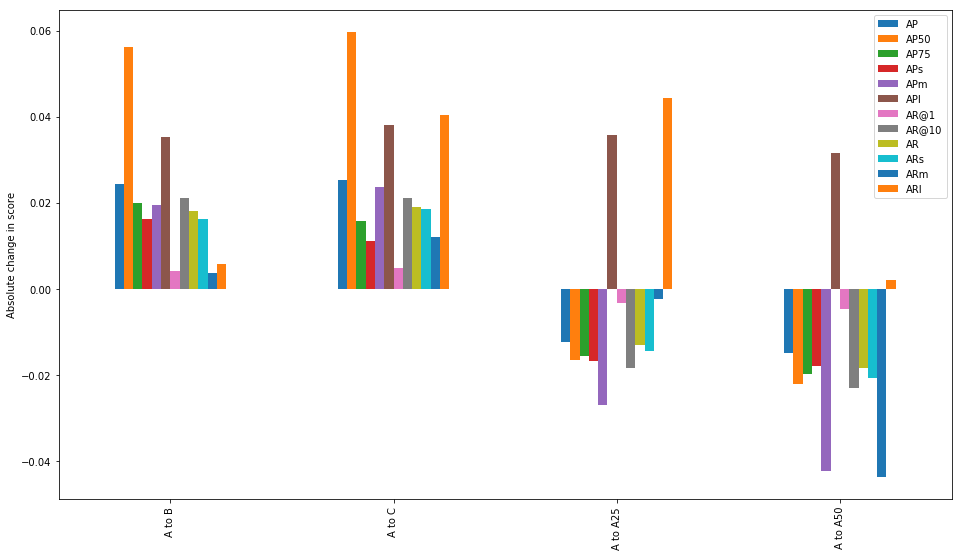

In [26]:
ax = df_combined.plot(kind = "bar", figsize = (16, 9))
ax.set_xlabel("")
ax.set_ylabel("Absolute change in score")

In [27]:
cf.go_offline(connected = True)
config = {
    "modeBarButtonsToRemove": ["sendDataToCloud"],
    "displaylogo": False
}
layout = {
    "title": "Impact of GAN-based augmentation",
    "yaxis": {
        "title": "Absolute change in score"
    },
    "width": 960,
    "height": 540
}
fig = df_combined.iplot(kind = "bar", y = ["AP", "AP50", "AP75", "APs", "APm", "APl", "AR@1", "AR@10", "AR", "ARs", "ARm", "ARl"], layout = layout, asFigure = True)
py.offline.iplot(fig, show_link = False, config = config)

In [28]:
df_combined = df_combined * 100

Text(0, 0.5, 'Absolute change in score (%)')

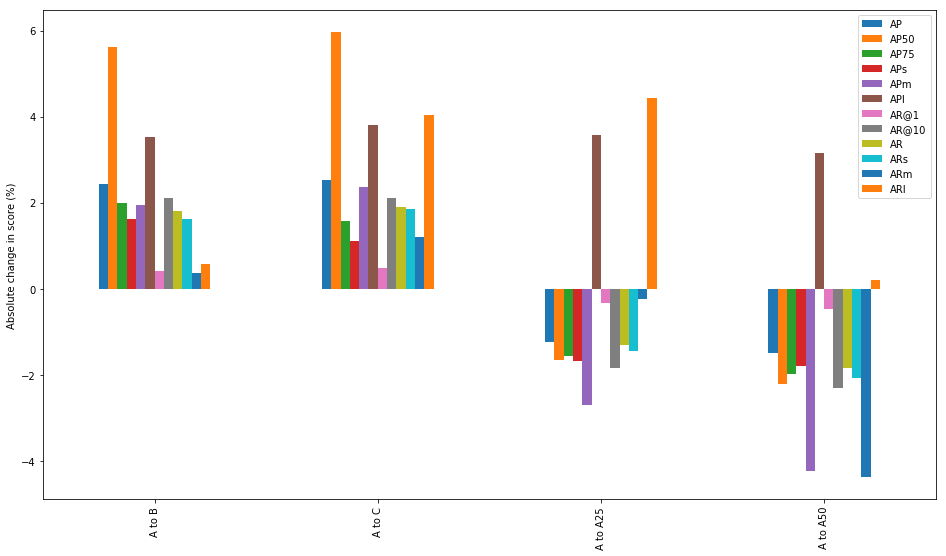

In [29]:
ax = df_combined.plot(kind = "bar", figsize = (16, 9))
ax.set_xlabel("")
ax.set_ylabel("Absolute change in score (%)")

In [30]:
layout = {
    "title": "Impact of GAN-based augmentation",
    "yaxis": {
        "title": "Absolute change in score (%)"
    },
    "width": 960,
    "height": 540
}
fig = df_combined.iplot(kind = "bar", y = ["AP", "AP50", "AP75", "APs", "APm", "APl", "AR@1", "AR@10", "AR", "ARs", "ARm", "ARl"], layout = layout, asFigure = True)
py.offline.iplot(fig, show_link = False, config = config)